In [79]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential  # Model type to be used
from keras.layers import Dense, Dropout, Activation # Types of layers for the model
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l2 
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import numpy as np                   # advanced math library
import random                        # for generating random numbers
import pandas as pd

In [52]:
# Load the dataset
data = pd.read_csv('data.csv')

In [53]:
#seperate features
X = data.drop('Y', axis=1)
Y = data['Y']

In [54]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
#standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
#building model and create
def create_model():
    model = Sequential()
    model.add(Dense(500, input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)))  # Add L2 regularization
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(500, kernel_regularizer=l2(0.01)))  # Add L2 regularization
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

# Summarize the built model
model = create_model()
model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 500)               3000      
                                                                 
 activation_186 (Activation  (None, 500)               0         
 )                                                               
                                                                 
 dropout_124 (Dropout)       (None, 500)               0         
                                                                 
 dense_187 (Dense)           (None, 500)               250500    
                                                                 
 activation_187 (Activation  (None, 500)               0         
 )                                                               
                                                                 
 dropout_125 (Dropout)       (None, 500)             

In [57]:
# categorical cross-entropy is a loss function to comparing two probability distributions.
# use the Adam optimizer for learning
# The optimizer helps determine how quickly the model learns through gradient descent. 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
#EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [69]:
#training
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=20, batch_size=32, callbacks=[early_stopping])

Epoch 1/20
204/204 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9879 - val_loss: 0.0571 - val_accuracy: 0.9883
Epoch 2/20
204/204 [==============================] - 1s 3ms/step - loss: 0.0632 - accuracy: 0.9873 - val_loss: 0.0581 - val_accuracy: 0.9883
Epoch 3/20
204/204 [==============================] - 1s 3ms/step - loss: 0.0625 - accuracy: 0.9879 - val_loss: 0.0590 - val_accuracy: 0.9883
Epoch 4/20
204/204 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9873 - val_loss: 0.0587 - val_accuracy: 0.9883
Epoch 5/20
204/204 [==============================] - 1s 3ms/step - loss: 0.0617 - accuracy: 0.9879 - val_loss: 0.0552 - val_accuracy: 0.9883
Epoch 6/20
204/204 [==============================] - 1s 3ms/step - loss: 0.0614 - accuracy: 0.9873 - val_loss: 0.0549 - val_accuracy: 0.9883
Epoch 7/20
204/204 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9877 - val_loss: 0.0590 - val_accuracy: 0.9883
Epoch 

In [70]:
#Evaluation
score = model.evaluate(X_test_scaled, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

51/51 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 0.9883
Test score: 0.05156561732292175
Test accuracy: 0.9883363842964172


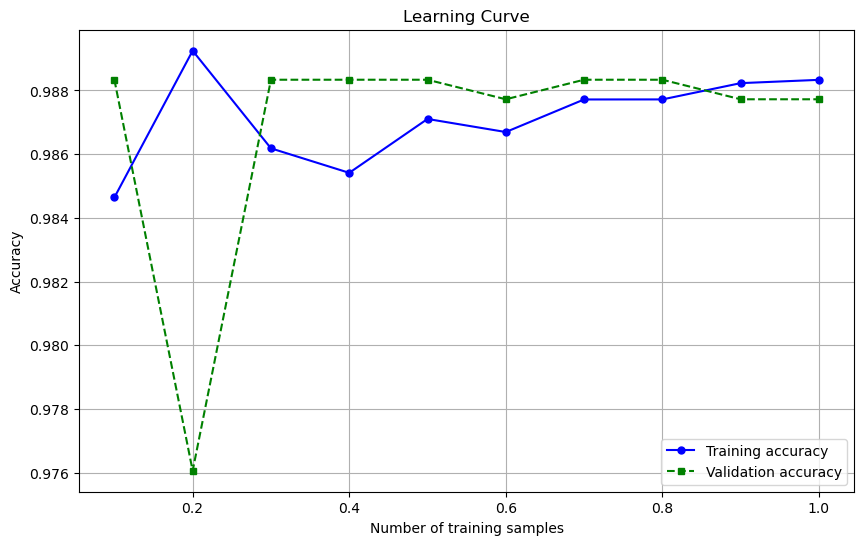

In [71]:
#learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_accuracy = []
test_accuracy = []

for size in train_sizes:
    subset_size = int(size * X_train_scaled.shape[0])
    X_subset = X_train_scaled[:subset_size]
    Y_subset = Y_train[:subset_size]
    
    model = create_model()  # Recreate the model for each subset
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_subset, Y_subset, validation_data=(X_test_scaled, Y_test), epochs=20, batch_size=32, verbose=0)
    
    train_accuracy.append(history.history['accuracy'][-1])
    test_accuracy.append(history.history['val_accuracy'][-1])

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracy, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_accuracy, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [72]:
#fix overfitting

In [77]:
#using Kmeans algo
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

# Perform cross-validation
# Instead of using cross_val_score, use cross_val_predict to get cluster assignments
from sklearn.model_selection import cross_val_predict

# This function returns the predicted cluster assignments for each data point
cluster_assignments = cross_val_predict(kmeans, X, cv=4)


D:\Users\stuff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\stuff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\stuff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\stuff\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


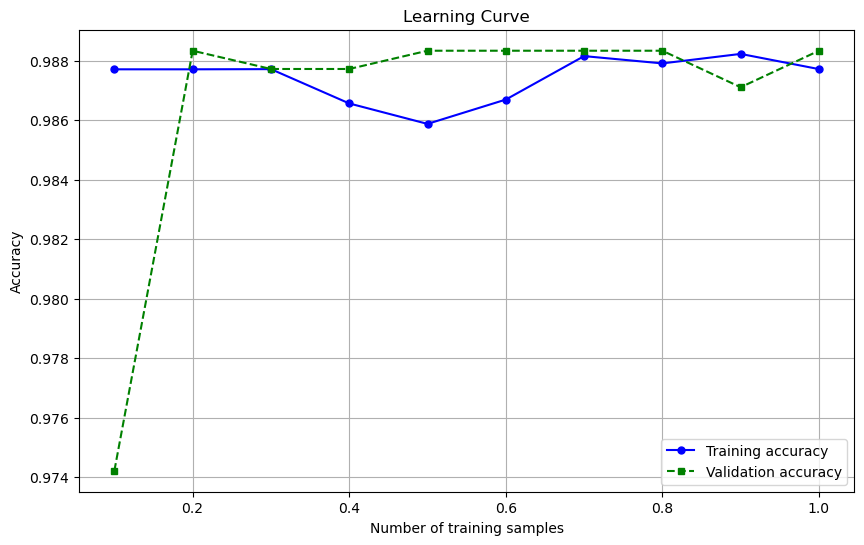

In [78]:
#learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_accuracy = []
test_accuracy = []

for size in train_sizes:
    subset_size = int(size * X_train_scaled.shape[0])
    X_subset = X_train_scaled[:subset_size]
    Y_subset = Y_train[:subset_size]
    
    model = create_model()  # Recreate the model for each subset
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_subset, Y_subset, validation_data=(X_test_scaled, Y_test), epochs=20, batch_size=32, verbose=0)
    
    train_accuracy.append(history.history['accuracy'][-1])
    test_accuracy.append(history.history['val_accuracy'][-1])

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_accuracy, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_accuracy, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#By using K-means, regularization (l2), and early stopping we got rid of our overfitting problem

In [80]:
#Final Evaluation
score = model.evaluate(X_test_scaled, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

51/51 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9883
Test score: 0.05807098373770714
Test accuracy: 0.9883363842964172
